In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-music-reviews/Musical_Instruments_5.json
/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv


In [12]:
path = '/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv'
df = pd.read_csv(path)


In [13]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [26]:
print(df.shape)

(10261, 9)


## EDA TIME

In [29]:
df['helpful']


0          [0, 0]
1        [13, 14]
2          [1, 1]
3          [0, 0]
4          [0, 0]
           ...   
10256      [0, 0]
10257      [0, 0]
10258      [0, 0]
10259      [0, 0]
10260      [0, 0]
Name: helpful, Length: 10261, dtype: object

In [36]:
df['summary']

0                                                     good
1                                                     Jake
2                                     It Does The Job Well
3                            GOOD WINDSCREEN FOR THE MONEY
4                    No more pops when I record my vocals.
                               ...                        
10256                                           Five Stars
10257    Long life, and for some players, a good econom...
10258                                     Good for coated.
10259                                          Taylor Made
10260    These strings are really quite good, but I wou...
Name: summary, Length: 10261, dtype: object

In [37]:
df['overall']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
10256    5.0
10257    5.0
10258    4.0
10259    4.0
10260    4.0
Name: overall, Length: 10261, dtype: float64

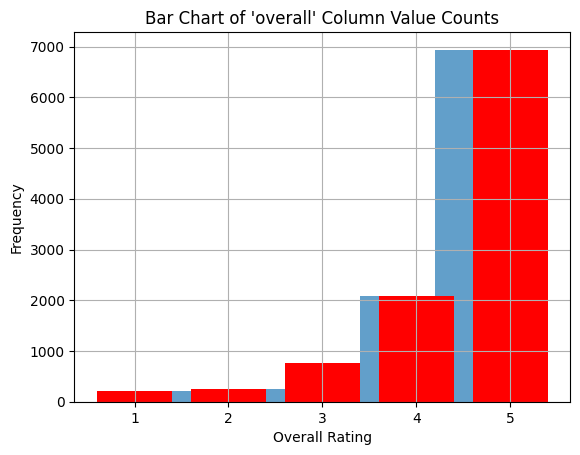

In [44]:

import matplotlib.pyplot as plt

df['overall'].hist(bins=5, alpha =0.7)
df['overall'].value_counts()
value_counts = df['overall'].value_counts()
value_counts = value_counts.sort_index()  # Sorting by index (rating)

plt.bar(value_counts.index, value_counts.values, color='red')
plt.title("Bar Chart of 'overall' Column Value Counts")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

### NLTK practice



In [74]:
import nltk
# for i in range(500):
#     if len(df['summary'][i]) > 65:
#         print(df['summary'][i])
#         print(i)
text  = df['summary'][52]
print(text)

 

I have bought many cables and this one is the only one that gives me problems


In [75]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')  # Download the Punkt tokenizer models if not already downloaded

 

# Sentence tokenization
sentences = sent_tokenize(text)
print("Sentences:")
print(sentences)

# Word tokenization
words = word_tokenize(text)
print("\nWords:")
print(words)

print()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Sentences:
['I have bought many cables and this one is the only one that gives me problems']

Words:
['I', 'have', 'bought', 'many', 'cables', 'and', 'this', 'one', 'is', 'the', 'only', 'one', 'that', 'gives', 'me', 'problems']


In [76]:
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger model if not already downloaded
pos_tags = nltk.pos_tag(words)

# Display the POS tags
print("POS Tags:")
print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
POS Tags:
[('I', 'PRP'), ('have', 'VBP'), ('bought', 'VBN'), ('many', 'JJ'), ('cables', 'NNS'), ('and', 'CC'), ('this', 'DT'), ('one', 'CD'), ('is', 'VBZ'), ('the', 'DT'), ('only', 'JJ'), ('one', 'NN'), ('that', 'WDT'), ('gives', 'VBZ'), ('me', 'PRP'), ('problems', 'NNS')]


In [78]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


sia = SentimentIntensityAnalyzer()

In [80]:
sia.polarity_scores(text)

{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4019}

### time to run the polarity score on the dataset


In [141]:
res = {}
## dictionary to store result

for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row['summary']
    revid = row['reviewerID']
    res[revid] = sia.polarity_scores(text)
    

  0%|          | 0/10261 [00:00<?, ?it/s]

In [142]:
res

{'A2IBPI20UZIR0U': {'neg': 0.0,
  'neu': 0.196,
  'pos': 0.804,
  'compound': 0.6249},
 'A14VAT5EAX3D9S': {'neg': 0.0,
  'neu': 0.185,
  'pos': 0.815,
  'compound': 0.6588},
 'A195EZSQDW3E21': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'A2C00NNG1ZQQG2': {'neg': 0.0,
  'neu': 0.618,
  'pos': 0.382,
  'compound': 0.4754},
 'A94QU4C90B1AX': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'A2A039TZMZHH9Y': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.872},
 'A1UPZM995ZAH90': {'neg': 0.0,
  'neu': 0.278,
  'pos': 0.722,
  'compound': 0.6369},
 'AJNFQI3YR6XJ5': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'A3M1PLEYNDEYO8': {'neg': 0.0,
  'neu': 0.268,
  'pos': 0.732,
  'compound': 0.8481},
 'AMNTZU1YQN1TH': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'A2NYK9KWFMJV4Y': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'A35QFQI0M46LWO': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'A2NIT6BKW11XJQ': {'neg': 0.0,
  'neu': 0.408,


In [143]:
res = pd.DataFrame(res)
res = res.transpose()
# res = res.reset_index().index
res.head()


,neg,neu,pos,compound
A2IBPI20UZIR0U,0.0,0.196,0.804,0.6249
A14VAT5EAX3D9S,0.0,0.185,0.815,0.6588
A195EZSQDW3E21,0.0,1.000,0.000,0.0000
A2C00NNG1ZQQG2,0.0,0.618,0.382,0.4754
A94QU4C90B1AX,0.0,1.000,0.000,0.0000


In [144]:
# res = res.reset_index()



                neg    neu    pos  compound
A2IBPI20UZIR0U  0.0  0.196  0.804    0.6249
A14VAT5EAX3D9S  0.0  0.185  0.815    0.6588
A195EZSQDW3E21  0.0  1.000  0.000    0.0000
A2C00NNG1ZQQG2  0.0  0.618  0.382    0.4754
A94QU4C90B1AX   0.0  1.000  0.000    0.0000


,neg,neu,pos,compound
count,1429.000000,1429.000000,1429.000000,1429.000000
mean,0.032725,0.567880,0.399395,0.324791
std,0.124852,0.332317,0.338423,0.333284
min,0.000000,0.000000,0.000000,-0.782400
25%,0.000000,0.294000,0.000000,0.000000
50%,0.000000,0.508000,0.451000,0.440400
75%,0.000000,1.000000,0.677000,0.624900
max,1.000000,1.000000,1.000000,0.931200


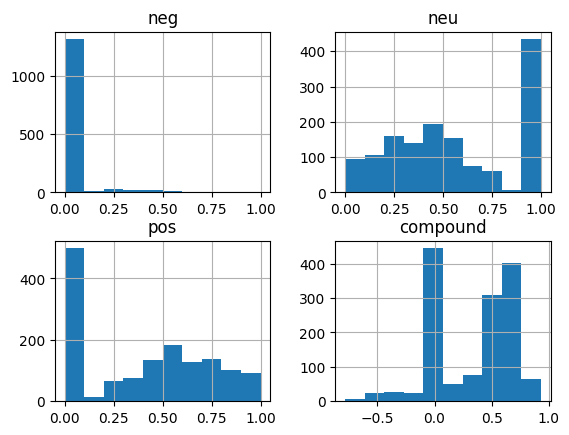

In [145]:
print(res.head())
res.hist()
res.describe()

In [149]:
res


,neg,neu,pos,compound
A2IBPI20UZIR0U,0.0,0.196,0.804,0.6249
A14VAT5EAX3D9S,0.0,0.185,0.815,0.6588
A195EZSQDW3E21,0.0,1.000,0.000,0.0000
A2C00NNG1ZQQG2,0.0,0.618,0.382,0.4754
A94QU4C90B1AX,0.0,1.000,0.000,0.0000
...,...,...,...,...
A3KZEGBTPH6MMF,0.0,0.672,0.328,0.6588
A27EWIL4YBWTA0,0.0,1.000,0.000,0.0000
A14JBDSWKPKTZA,0.0,0.389,0.611,0.7818
A3HH71P93ZWAMB,0.0,0.420,0.580,0.8652


In [150]:
# Assuming 'reviewerID' is the column in df that corresponds to the keys in the res dictionary
df = df.merge(res, how = 'left')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [132]:
res.head()

,neg,neu,pos,compound
0,0.0,0.196,0.804,0.6249
1,0.0,0.185,0.815,0.6588
2,0.0,1.000,0.000,0.0000
3,0.0,0.618,0.382,0.4754
4,0.0,1.000,0.000,0.0000


In [137]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment_scores
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",NaN
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",NaN
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",NaN
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",NaN
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",NaN
